# Exercise 03: Distributions and patterns

The overall goal of this exercise is to practice visual exploration of distributions for identifying and interpreting patterns in distributions. The exercise includes:
<ul>
    <li>Exploration of temporal and spatial distributions of discrete entities using time histograms and maps. </li>
    <li>Exploration of a joint distribution of multiple attributes over a set of entities using spatialisation.</li>
</ul>

For a more detailed description, refer to the exercise description document.

A video demonstrating interactive data exploration using V-Analytics is: <a href=distributions.mp4>distributions.mp4</a>

If <i>folium</i> is not installed on your computer, execute the following command

<pre>conda install -c conda-forge folium geopandas tornado==4.5.3</pre>

## Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from folium.plugins import HeatMap
#from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
from collections import Counter

pd.set_option("display.max.columns", None)

np.random.seed(123)

### Load a dataset describing storm-related tweets

In [2]:
df = pd.read_csv('storm_tweets.csv')
df.head(10)

,id,Name,X,Y,LONGITUDE,LATITUDE,MESSAGEDATE,USERSCREENNAME,MESSAGETEXT,LOCATION,HASHTAGS,Features,keyword=storm,keyword=wind,keyword=rain,keyword=snow,keyword=hail,keyword=flood,keyword=road,keyword=collapse,keyword=ingury,keyword=disrupt,keyword=forecast,Mask,bad weather (sum),consequence (sum),bad weather,consequence
0,581338551868063744,storm,0.071042,52.094433,0.071042,52.094433,27/03/2015 06:14:46,Willis12Pat,Love retirement! My day.. The 7's taping the ...,Fowlmere; England,NaN,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
1,581312068629954560,wind,-3.086356,53.060090,-3.086356,53.060089,27/03/2015 04:29:32,secondhand_shed,@tonywilliams68 @wrexham strong winds sorry ;i...,Minera; Wales,NaN,wind,0,1,0,0,0,0,0,0,0,0,0,1000000000,1.0,0.0,1.0,0.0
2,581274239308832769,flood,-1.118795,52.617813,-1.118795,52.617813,27/03/2015 01:59:12,DrJonMillett,@Leicester_Merc New street lamp is like living...,Leicester; England,NaN,flood,0,0,0,0,0,1,0,0,0,0,0,100000,0.0,1.0,0.0,1.0
3,581347370438393856,storm,-0.462822,53.219820,-0.462822,53.219818,27/03/2015 06:49:48,CunninghamKian,The calm before the storm ... http://t.co/7Pv5...,Washingborough; England,NaN,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
4,581346808099684352,disrupt,0.012129,50.870740,0.012129,50.870739,27/03/2015 06:47:34,philhillslewes,@NRE_Southern @brightonstation what about disr...,Lewes; England,NaN,disrupt,0,0,0,0,0,0,0,0,0,1,0,10,0.0,1.0,0.0,1.0
5,581270572723634176,forecast,0.252533,51.511170,0.252533,51.511169,27/03/2015 01:44:38,TheMockneyRebel,Guardian/ICM survey puts Labour in line to gai...,Aveley; England,NaN,forecast,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0
6,581342565477277696,wind;rain,-4.264500,55.453500,-4.264500,55.453499,27/03/2015 06:30:43,twt_wthr_py,Sat: max 10C feels 6C Wind W 27mph Rain 97% He...,Cumnock; Scotland,Cumnock,wind;rain,0,1,1,0,0,0,0,0,0,0,0,1100000000,2.0,0.0,1.0,0.0
7,581335562138714112,rain;forecast,-1.476630,52.922770,-1.476630,52.922771,27/03/2015 06:02:53,DailyDERBYS,Sunday: Heavy Rain Shower; Maximum Temperature...,Derby; England,Derbyshire Weather,rain;forecast,0,0,1,0,0,0,0,0,0,0,1,100000001,1.0,0.0,1.0,0.0
8,581344323721170944,storm,-0.232172,51.491104,-0.232172,51.491104,27/03/2015 06:37:42,F1taxi,@MercedesAMGF1 getting hotter any chance of a ...,Hammersmith; London,NaN,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0
9,581344763741396992,storm,-0.323126,51.576023,-0.323126,51.576023,27/03/2015 06:39:27,allyc375,Tip for maintaining remnants of sanity. Get up...,Brent; London,AllyInTheBin,storm,1,0,0,0,0,0,0,0,0,0,0,10000000000,1.0,0.0,1.0,0.0


### Transforming dates

In [3]:
df['msgdate']=pd.to_datetime(df['MESSAGEDATE'], format="%d/%m/%Y %H:%M:%S")
df.msgdate.head(10)

0   2015-03-27 06:14:46
1   2015-03-27 04:29:32
2   2015-03-27 01:59:12
3   2015-03-27 06:49:48
4   2015-03-27 06:47:34
5   2015-03-27 01:44:38
6   2015-03-27 06:30:43
7   2015-03-27 06:02:53
8   2015-03-27 06:37:42
9   2015-03-27 06:39:27
Name: msgdate, dtype: datetime64[ns]

In [4]:
df['MESSAGEDATE'] = pd.to_datetime(df['MESSAGEDATE'], format='%d/%m/%Y %H:%M:%S')
print('The column MESSAGEDATE is of type :', df.MESSAGEDATE.dtype)
print('The min value of MESSAGEDATE is', df.MESSAGEDATE.min(), 'whereas the max is :', df.MESSAGEDATE.max())

The column MESSAGEDATE is of type : datetime64[ns]
The min value of MESSAGEDATE is 2015-03-27 00:06:29 whereas the max is : 2015-04-02 13:40:59


## Visual exploration of the temporal distribution of the tweets
We shall visualise the temporal distribution by means of time histograms showing the counts of the posted tweets by hourly and daily time intervals.

The index type of the dataframe is <class 'pandas.core.indexes.datetimes.DatetimeIndex'> 

The highest value of the hourly count was 72 and was reached on 2015-03-30 23:00:00


/Users/ziad/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


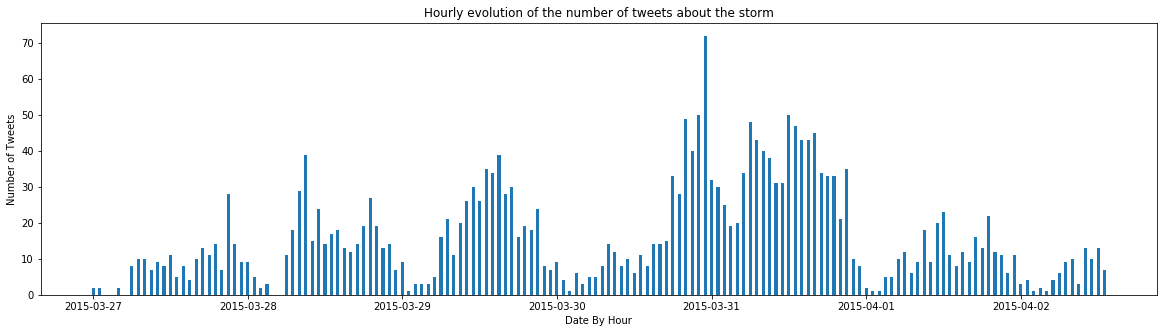

In [5]:
# In order to inspect temporal distribution and aggregate the time attribute flexibly,
# it's interesting to set the MESSAGEDATE column as an index of the dataframe, this will allow us to use the 
# powerful resample() method !
df.set_index(df['MESSAGEDATE'], inplace=True)
print('The index type of the dataframe is', type(df.index), '\n')# Let's refine the analysis by inspecting the temporal distribution by HOUR
df_count_hourly = df.resample('H').count()[['MESSAGETEXT']]

# Display the peak of the hourly count
print('The highest value of the hourly count was', df_count_hourly.MESSAGETEXT.max(), 'and was reached on', df_count_hourly.MESSAGETEXT.idxmax())

# Visualize the evolution
plt.figure(figsize = (20, 5))
plt.xlabel('Date By Hour')
plt.ylabel('Number of Tweets')
plt.title('Hourly evolution of the number of tweets about the storm')
plt.bar(df_count_hourly.index, df_count_hourly.values.flatten(), width = 0.02);

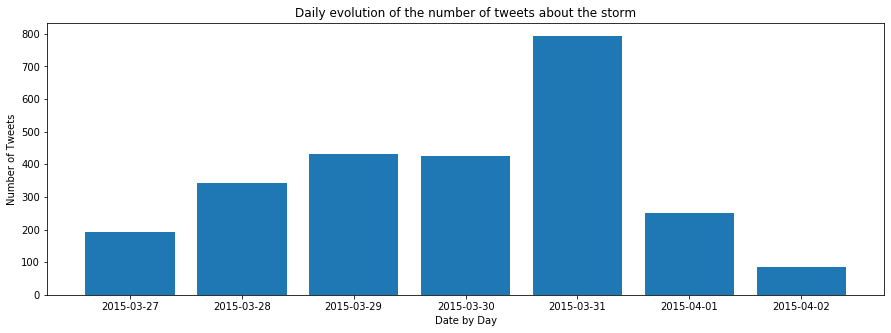

In [13]:
# In order to inspect temporal distribution and aggregate the time attribute flexibly,
# it's interesting to set the MESSAGEDATE column as an index of the dataframe, this will allow us to use the 
# powerful resample() method !
#df.set_index(df['MESSAGEDATE'], inplace=True)
#print('The index type of the dataframe is', type(df.index), '\n')

# Inspecting the temporal distribution by DAY
df_count_daily = df.resample('D').count()[['MESSAGETEXT']]

# Visualize the evolution
plt.figure(figsize = (15, 5))
plt.xlabel('Date by Day')
plt.ylabel('Number of Tweets')
plt.title('Daily evolution of the number of tweets about the storm')
plt.bar(df_count_daily.index, df_count_daily.values.flatten());

## Task: find different types of temporal patterns in the hourly and daily distributions
Possible types of temporal patterns to look for: increasing and decreasing trends, jump, drop, peak, trough, periodic repetition of some kind of pattern.

### Apply smoothing to the representation of the temporal distribution
Smoothing by means of kernel density estimation (KDE) increases the level of abstraction in representing the temporal distribution. We can disregard small fluctuations and moderate variation in the tweet number and see the overall temporal trend.<br>
<strong>Please note:</strong> KDE represents the data using a continuous <em>probability density</em> curve. The vertical axis of the plot represents the probability denstity rather than absolute counts of the tweets.<br>
In our example, we create two curves with different levels of smoothing.

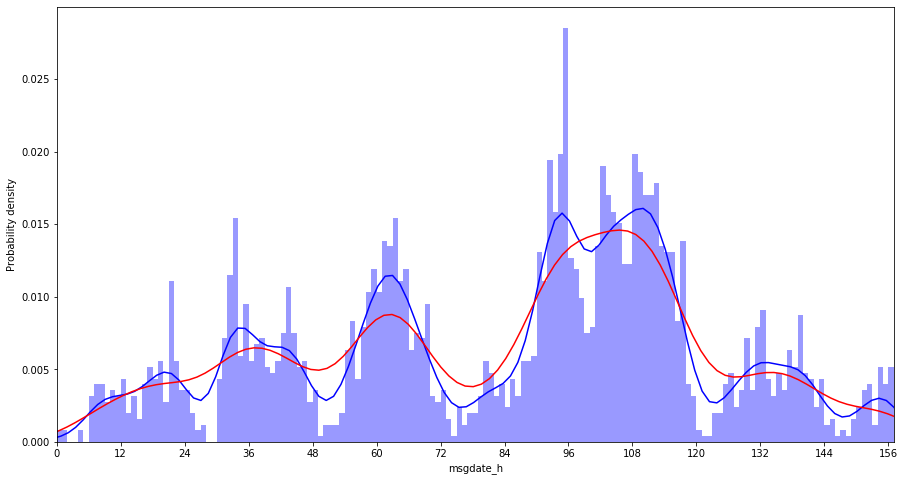

In [27]:
#Using Seaborn to make nicer plots + using KDE (kernal density estimate)
plt.figure(figsize=(15,8))
plt.xlabel('Hour')
plt.xlim(0, 157)
plt.xticks(np.arange(0, 157, 12))
plt.ylabel('Probability density')

df['msgdate_h']=(pd.to_datetime(df.msgdate)-pd.to_datetime(df.msgdate.min().date())).astype('int64')/1000000000/3600
sns.distplot(df.msgdate_h, bins=range(0,int(round(df.msgdate_h.max()))+1,1), 
             kde_kws={'bw': 3}, color="blue");
sns.distplot(df.msgdate_h, bins=range(0,int(round(df.msgdate_h.max()))+1,1), 
             kde_kws={'bw': 6}, color="red", hist=False);
# The value of the parameter "bw" regulates the smoothing bandwidth: 
# the larger the value, the more smoothing is applied

## Task: compare the smoothed representation with the original time histogram
What patterns can be seen only in the original histogram? What patterns are better visible in the smoothed representation?<br>
Regulate the smoothing level by means of the parameter <b>'bw'</b> (bandwidth), which is in this case the width of the time window, measured in hours. Larger values increase the smoothing level.

### Visualise the frequency distribution of the occurrences of different keywords
We use a frequency histogram to look at the total counts of the keyword occurrences.

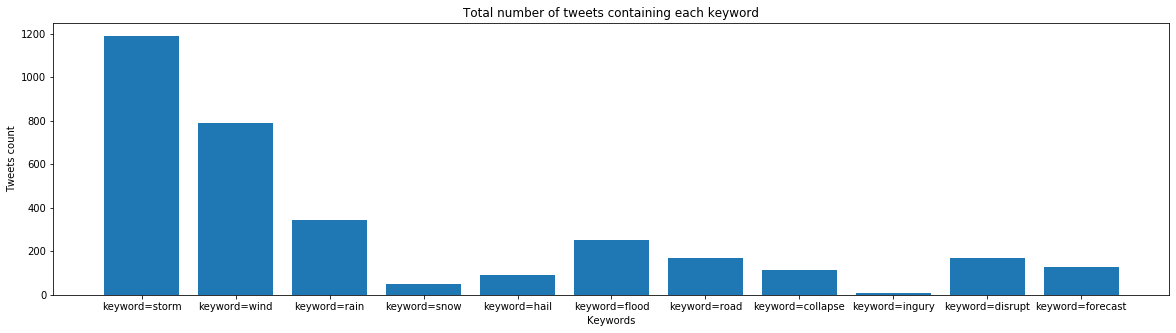

In [28]:
# Listing keywords
keywords = ['keyword=storm', 'keyword=wind', 'keyword=rain', 'keyword=snow', 'keyword=hail', 'keyword=flood',
            'keyword=road', 'keyword=collapse', 'keyword=ingury', 'keyword=disrupt', 'keyword=forecast']
# Visualizing the total occurence of the keywords
plt.figure(figsize=(20, 5))
plt.xlabel('Keywords')
plt.ylabel('Tweets count')
plt.title('Total number of tweets containing each keyword')
plt.bar(keywords, df[keywords].sum());

### Visualise the temporal distributions of the occurrences of the different keywords
The temporal distributions are visualised in the form of probability density curves built by means of KDE.

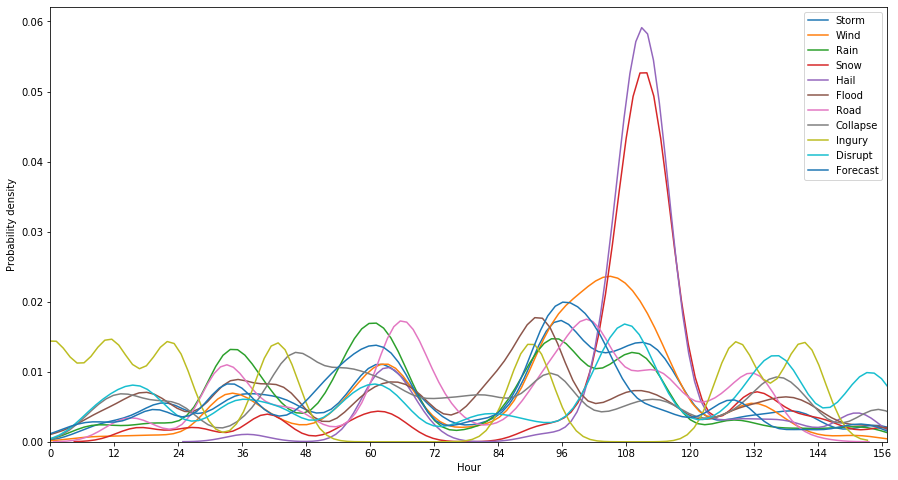

In [31]:
#Plotting the temporal distributions of the occurrences of different keywords in the form of probability density curves
plt.figure(figsize=(15,8))
plt.xlabel('Hour')
plt.ylabel('Probability density')
plt.xlim(0, 157)
plt.xticks(np.arange(0, 157, 12))

df['msgdate_h']=(pd.to_datetime(df.msgdate)-pd.to_datetime(df.msgdate.min().date())).astype('int64')/1000000000/3600

#sns.kdeplot(df.msgdate_h, label="Totals", bw=4)
sns.kdeplot(df[df['keyword=storm']>0].msgdate_h, label="Storm", bw=4)
sns.kdeplot(df[df['keyword=wind']>0].msgdate_h, label="Wind", bw=4)
sns.kdeplot(df[df['keyword=rain']>0].msgdate_h, label="Rain", bw=4)
sns.kdeplot(df[df['keyword=snow']>0].msgdate_h, label="Snow", bw=4)
sns.kdeplot(df[df['keyword=hail']>0].msgdate_h, label="Hail", bw=4)
sns.kdeplot(df[df['keyword=flood']>0].msgdate_h, label="Flood", bw=4)
sns.kdeplot(df[df['keyword=road']>0].msgdate_h, label="Road", bw=4)
sns.kdeplot(df[df['keyword=collapse']>0].msgdate_h, label="Collapse", bw=4)
sns.kdeplot(df[df['keyword=ingury']>0].msgdate_h, label="Ingury", bw=4)
sns.kdeplot(df[df['keyword=disrupt']>0].msgdate_h, label="Disrupt", bw=4)
sns.kdeplot(df[df['keyword=forecast']>0].msgdate_h, label="Forecast", bw=4)
plt.legend();

## Task: compare the temporal distribution patterns of the different keywords
Please comment and uncomment different lines of the code to for a better visibility and easier comparison of the distribution patterns of the different keywords.

### Visualise the spatial distribution of the tweets on a map
We first build a map where each tweet is represented by a dot. The dots have low opacity; hence, concentrations of dots appear as dark spots on the map. This allows you to observe the variation of the spatial density of the tweets over the territory and detect spatial clusters of tweets.

In [32]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
map = folium.Map(location=[ymm,xmm], zoom_start=6, width=600,height=700)
df.apply(lambda row:folium.CircleMarker(location=[row["Y"], row["X"]], 
                                        radius=3, opacity=.05, color='#cc0000').add_to(map), axis=1)
map

### Replace the dots by a density map (a.k.a. heatmap)
This operation represents the spatial distribution as a smooth continuous surface.

In [41]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=6, width=600,height=700)
hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                  min_opacity=0.1,
                  radius=10, blur=15, 
                  max_zoom=1)
hmap.add_child(hm_wide)

### Change the colour scale and the level of smoothing
We replace the "rainbow" colour scale, which is not recommended for representing numeric data, by a better one.<br>
The smoothing level is controlled by the value of the parameter 'radius'. Change the value of this parameter to observe its impact on the visible patterns.

In [42]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=6, width=600,height=700)
hm_wide = HeatMap(list(zip(df.LATITUDE.values, df.LONGITUDE.values)), 
                  min_opacity=0.2,
                  #radius=5,
                  radius=4.5,
                  blur=10, 
                  #Adjusting the radius will make areas more distict, and reducing blur will make map clearer!
                  max_zoom=1, gradient={.5: 'blue', .75: 'orange', 0.9: 'red'})
hmap.add_child(hm_wide)

## Task: characterise the spatial distribution of the tweets in terms of the variation of the spatial density.
What are the places where you observe high density of the tweets? How can you explain this pattern of the spatial distribution?

### Visualise the spatial distributions of the occurrences of different keywords
In the following two cells, we select the table rows with the occurrences of two different keywords, so that the spatial distributions of their occurrences could be compared.<br>
Select the rows containing other keywords to explore and compare the spatial distributions of these keywords.

In [43]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=6, width=600,height=700)
# Change the selection of the rows according to the keyword occurrence to observe the spatial distributions
# of the occurrences of different keywords
hm_wide = HeatMap(list(zip(df[df['keyword=rain']>0].LATITUDE.values, 
                           df[df['keyword=rain']>0].LONGITUDE.values)), 
                   min_opacity=0.2,
                   radius=7, blur=10, 
                   max_zoom=1, gradient={.6: 'blue', .9: 'orange', 1: 'red'}) 
hmap.add_child(hm_wide)

In [44]:
xmm=(df.X.min()+df.X.max())/2
ymm=(df.Y.min()+df.Y.max())/2
hmap = folium.Map(location=[ymm,xmm], zoom_start=6, width=600,height=700)
# Change the selection of the rows according to the keyword occurrence to observe the spatial distributions
# of the occurrences of different keywords
hm_wide = HeatMap(list(zip(df[df['keyword=hail']>0].LATITUDE.values, 
                           df[df['keyword=hail']>0].LONGITUDE.values)), 
                   min_opacity=0.2,
                   radius=7, blur=10, 
                   max_zoom=1, gradient={.6: 'blue', .9: 'orange', 1: 'red'}) 
hmap.add_child(hm_wide)

## Task: note and interpret differences in the spatial distributions of different keywords.
The distributions of which keywords notably differ from the overall distribution of thetweets? Are there places where certain events or phenomena had higher impact (or raised higher reaction in the social media) that in other places?


# Spatialisation: continued in the next notebook
<a href=Spatialisation.ipynb>Spatialisation.ipynb</a> (notebook)<br>
<a href=Spatialisation.html>Spatialisation.html</a> (HTML version)